In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


df= pd.read_pickle('../../data/Top Fund Positioning/t10_full_universe_weights_20230831.pkl')
df = df.reset_index()
df =df[df['lionshares_id']!='MFRKX-US']
df=df.set_index(['lionshares_id','Symbol'])
df.head()

Security Name Ticker-Region  \
lionshares_id Symbol                                           
JUEMX-US      594918104  Microsoft Corporation       MSFT-US   
              037833100             Apple Inc.       AAPL-US   
              67066G104     NVIDIA Corporation       NVDA-US   
              023135106       Amazon.com, Inc.       AMZN-US   
              02079K305  Alphabet Inc. Class A      GOOGL-US   

                                    GICS Sector  \
lionshares_id Symbol                              
JUEMX-US      594918104  Information Technology   
              037833100  Information Technology   
              67066G104  Information Technology   
              023135106  Consumer Discretionary   
              02079K305  Communication Services   

                                                GICS Industry Name  \
lionshares_id Symbol                                                 
JUEMX-US      594918104                                   Software   
              037833100  Technology Hardware Storage & Peripherals   
              67066G104   Semiconductors & Semiconductor Equipment   
              023135106                           Broadline Retail   
              02079K305               Interactive Media & Services   

                                                  GICS Industry Group  \
lionshares_id Symbol                                                    
JUEMX-US      594918104                           Software & Services   
              037833100               Technology Hardware & Equipment   
              67066G104      Semiconductors & Semiconductor Equipment   
              023135106  Consumer Discretionary Distribution & Retail   
              02079K305                         Media & Entertainment   

                                                 GICS Sub Industry  \
lionshares_id Symbol                                                 
JUEMX-US      594918104                           Systems Software   
              037833100  Technology Hardware Storage & Peripherals   
              67066G104                             Semiconductors   
              023135106                           Broadline Retail   
              02079K305               Interactive Media & Services   

                        Region of Domicile   MSCI Country P_Country  \
lionshares_id Symbol                                                  
JUEMX-US      594918104      North America  United States        US   
              037833100      North America  United States        US   
              67066G104      North America  United States        US   
              023135106      North America  United States        US   
              02079K305      North America  United States        US   

                            FF_Country  ...  Active Weight     Asset Type  \
lionshares_id Symbol                    ...                                 
JUEMX-US      594918104  UNITED STATES  ...       2.753458  Equity Common   
              037833100  UNITED STATES  ...      -1.505110  Equity Common   
              67066G104  UNITED STATES  ...       1.047936  Equity Common   
              023135106  UNITED STATES  ...       0.556445  Equity Common   
              02079K305  UNITED STATES  ...       1.210812  Equity Common   

                         Asset Class      DATE  Fund Ticker          FFD_NAME  \
lionshares_id Symbol                                                            
JUEMX-US      594918104       Equity  20230831        JUEMX  JPMorgan Trust I   
              037833100       Equity  20230831        JUEMX  JPMorgan Trust I   
              67066G104       Equity  20230831        JUEMX  JPMorgan Trust I   
              023135106       Equity  20230831        JUEMX  JPMorgan Trust I   
              02079K305       Equity  20230831        JUEMX  JPMorgan Trust I   

                        P_PRICE(0,USD)           aum bench_id Fund Brand  
lionshares_id Symbol                               

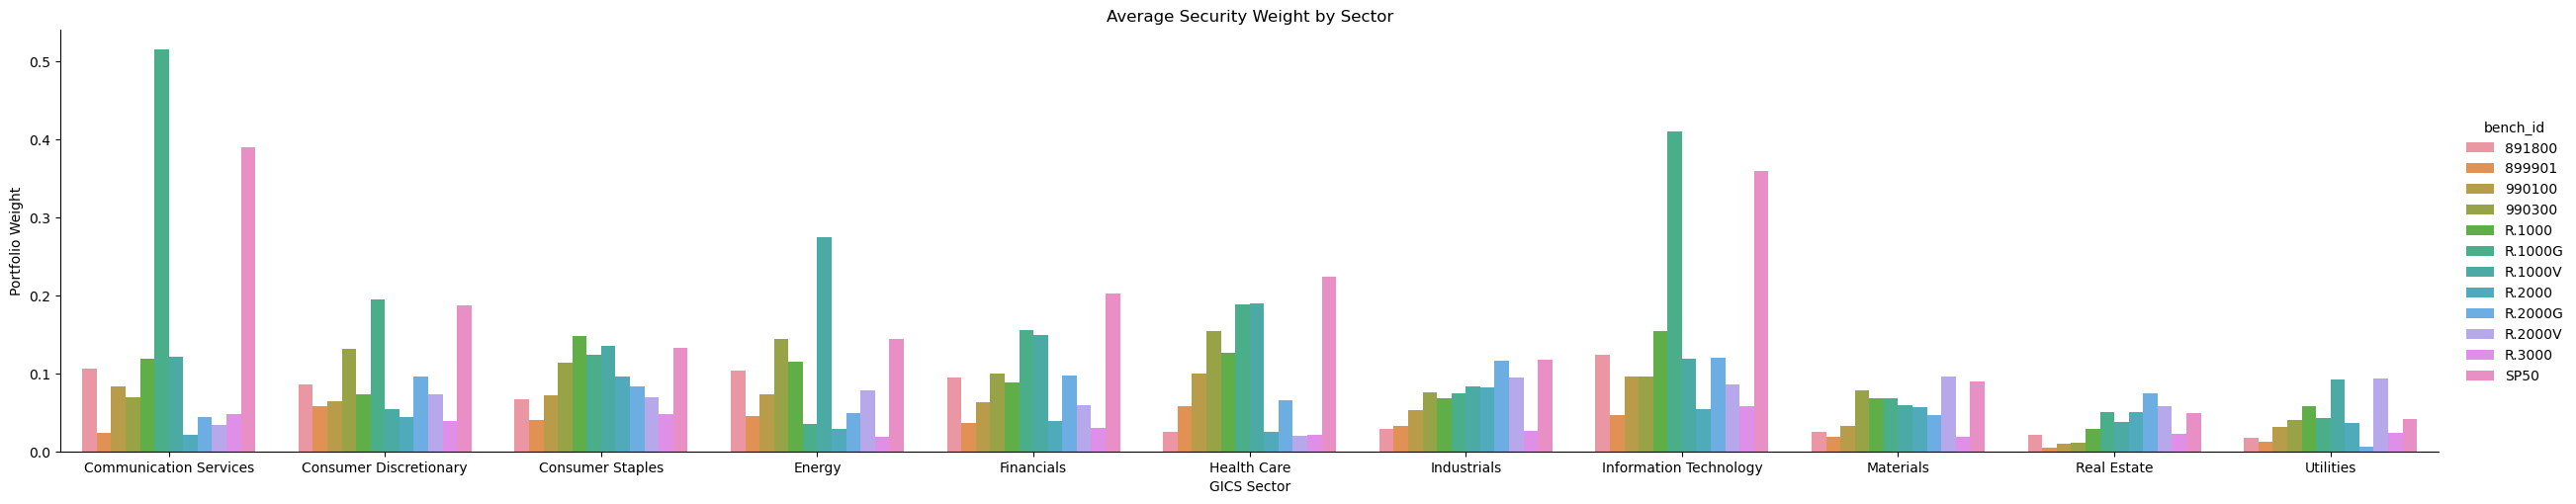

In [14]:
df_plot = df[df['GICS Sector']!='Other'].groupby(['bench_id','GICS Sector']).agg({'Portfolio Weight':'mean'})
sns.catplot(data=df_plot.reset_index(),
            x = 'GICS Sector',
            y = 'Portfolio Weight',
            hue = 'bench_id',  
            kind = 'bar',
            aspect = 5,
            )
plt.title('Average Security Weight by Sector')
plt.show()

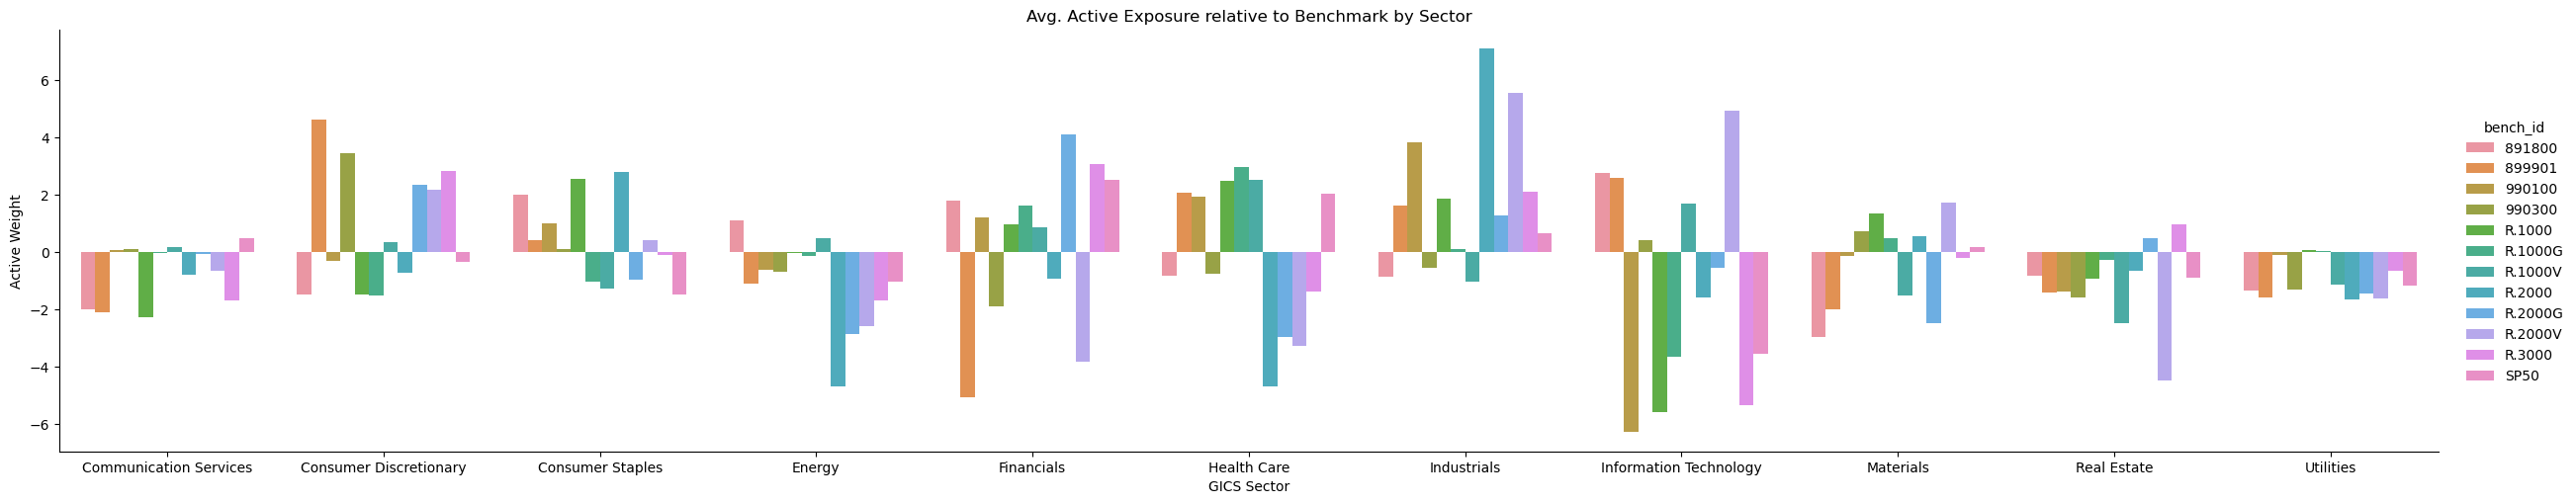

In [106]:
df_plot = df[df['GICS Sector']!='Other'].groupby(['bench_id','lionshares_id','GICS Sector']).agg({'Active Weight':'sum'}).groupby(['bench_id','GICS Sector']).agg({'Active Weight':'mean'})
sns.catplot(data=df_plot.reset_index(),
            x = 'GICS Sector',
            y = 'Active Weight',
            hue = 'bench_id',  
            kind = 'bar',
            aspect = 5,
            )
plt.title('Avg. Active Exposure relative to Benchmark by Sector')
plt.savefig('top_fund_positioning_avg_sector_active_exp_catplot.png')
plt.show()

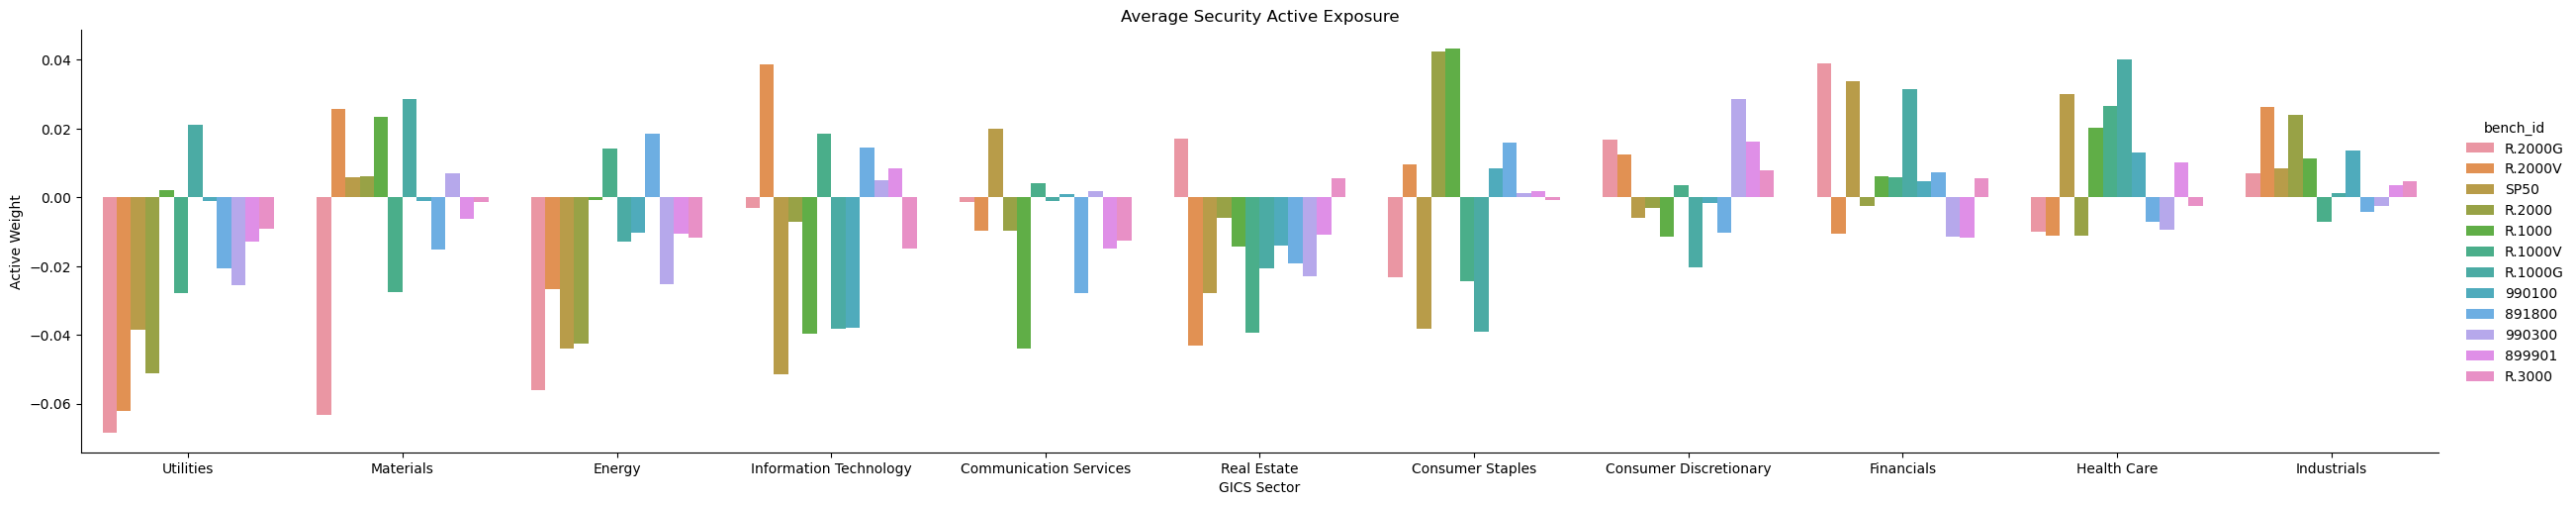

In [16]:
df_plot = df[df['GICS Sector']!='Other'].groupby(['bench_id','GICS Sector']).agg({'Active Weight':'mean'}).sort_values('Active Weight')
sns.catplot(data=df_plot.reset_index(),
            x = 'GICS Sector',
            y = 'Active Weight',
            hue = 'bench_id',  
            kind = 'bar',
        aspect = 5,
            )
plt.title('Average Security Active Exposure')
plt.show()

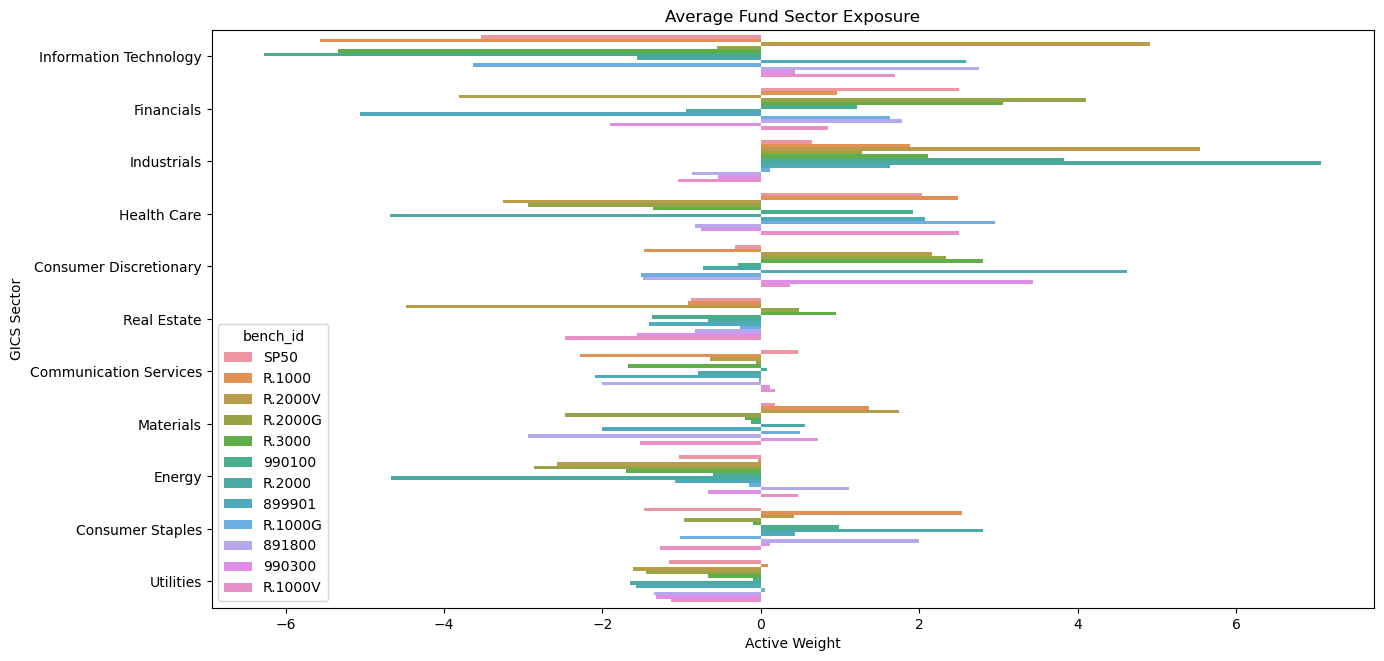

In [17]:
fig, axs = plt.subplots(figsize=(15,7.5))
df_plot = df[df['GICS Sector']!='Other'].groupby(['bench_id','GICS Sector','Fund Ticker']).agg({'Active Weight':'sum'}).sort_values('Active Weight')
sns.barplot(data=df_plot.reset_index(),
            y = 'GICS Sector',
            x = 'Active Weight',
            hue = 'bench_id',  
            errorbar=None,
            orient ='h'
            )
plt.title('Average Fund Sector Exposure')
plt.show()

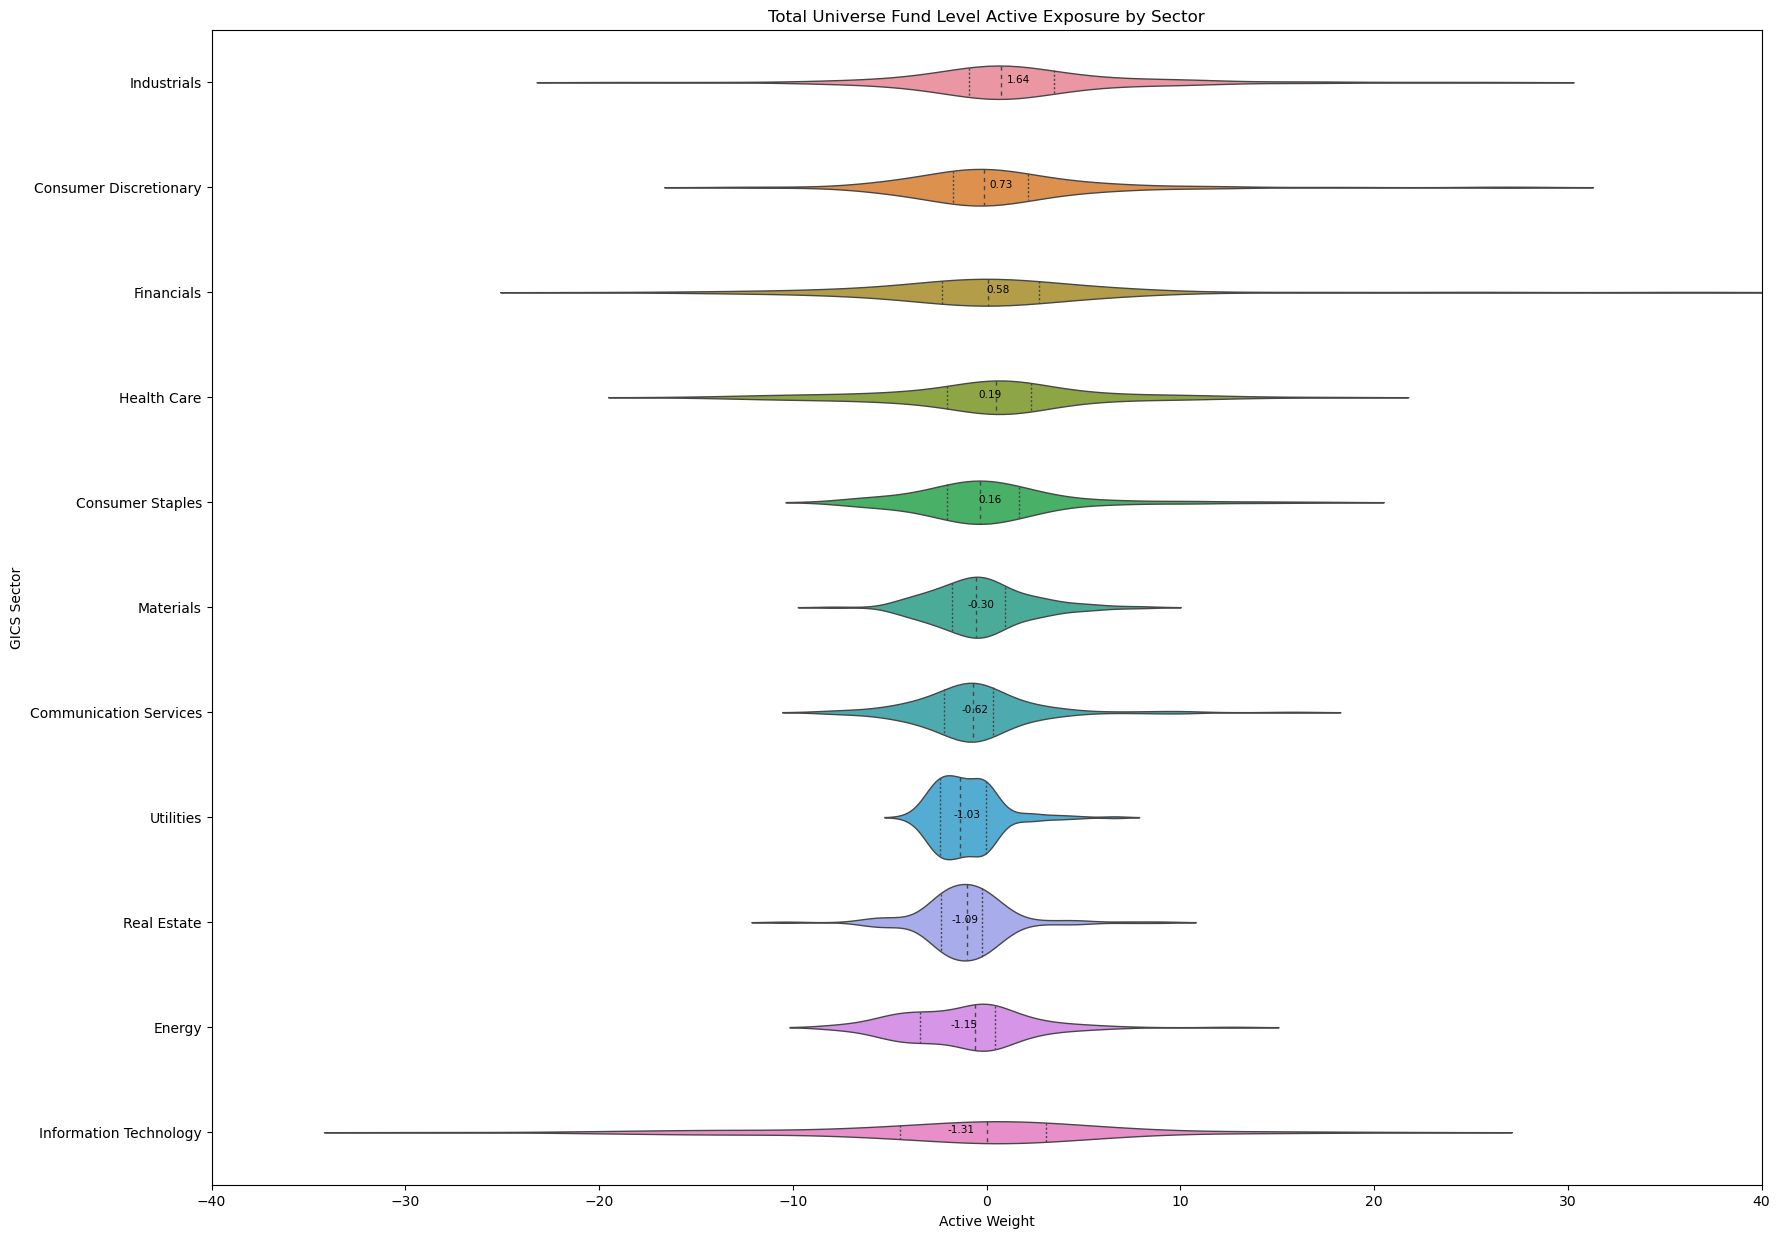

In [88]:
fig, axs = plt.subplots(figsize=(20,15))  #
df_aggregated = df[df['GICS Sector']!='Other'].groupby(['bench_id','GICS Sector','Fund Ticker']).agg({'Active Weight':'sum'}).reset_index()

# Calculate means for each sector
mean_aw = df_aggregated.groupby('GICS Sector')['Active Weight'].mean()
sectors = mean_aw.sort_values(ascending =False).index 

sns.violinplot(data=df_aggregated ,y="GICS Sector", x="Active Weight",order=sectors,
               inner="quart", linewidth=1,orient ='h')

plt.xlim(-40,40)
# Add mean labels to violin plot
for i, sector in enumerate(sectors):
    axs.text(mean_aw[sector], i, "{:.2f}".format(mean_aw[sector]), fontsize=7.5, ha='center')
plt.title('Total Universe Fund Level Active Exposure by Sector')
plt.savefig('top_fund_positioning_avg_sector_active_exp_violinplots.png')
plt.show()

Index(['Information Technology', 'Energy', 'Real Estate', 'Utilities',
       'Communication Services', 'Materials', 'Consumer Staples',
       'Health Care', 'Financials', 'Consumer Discretionary', 'Industrials'],
      dtype='object', name='GICS Sector')

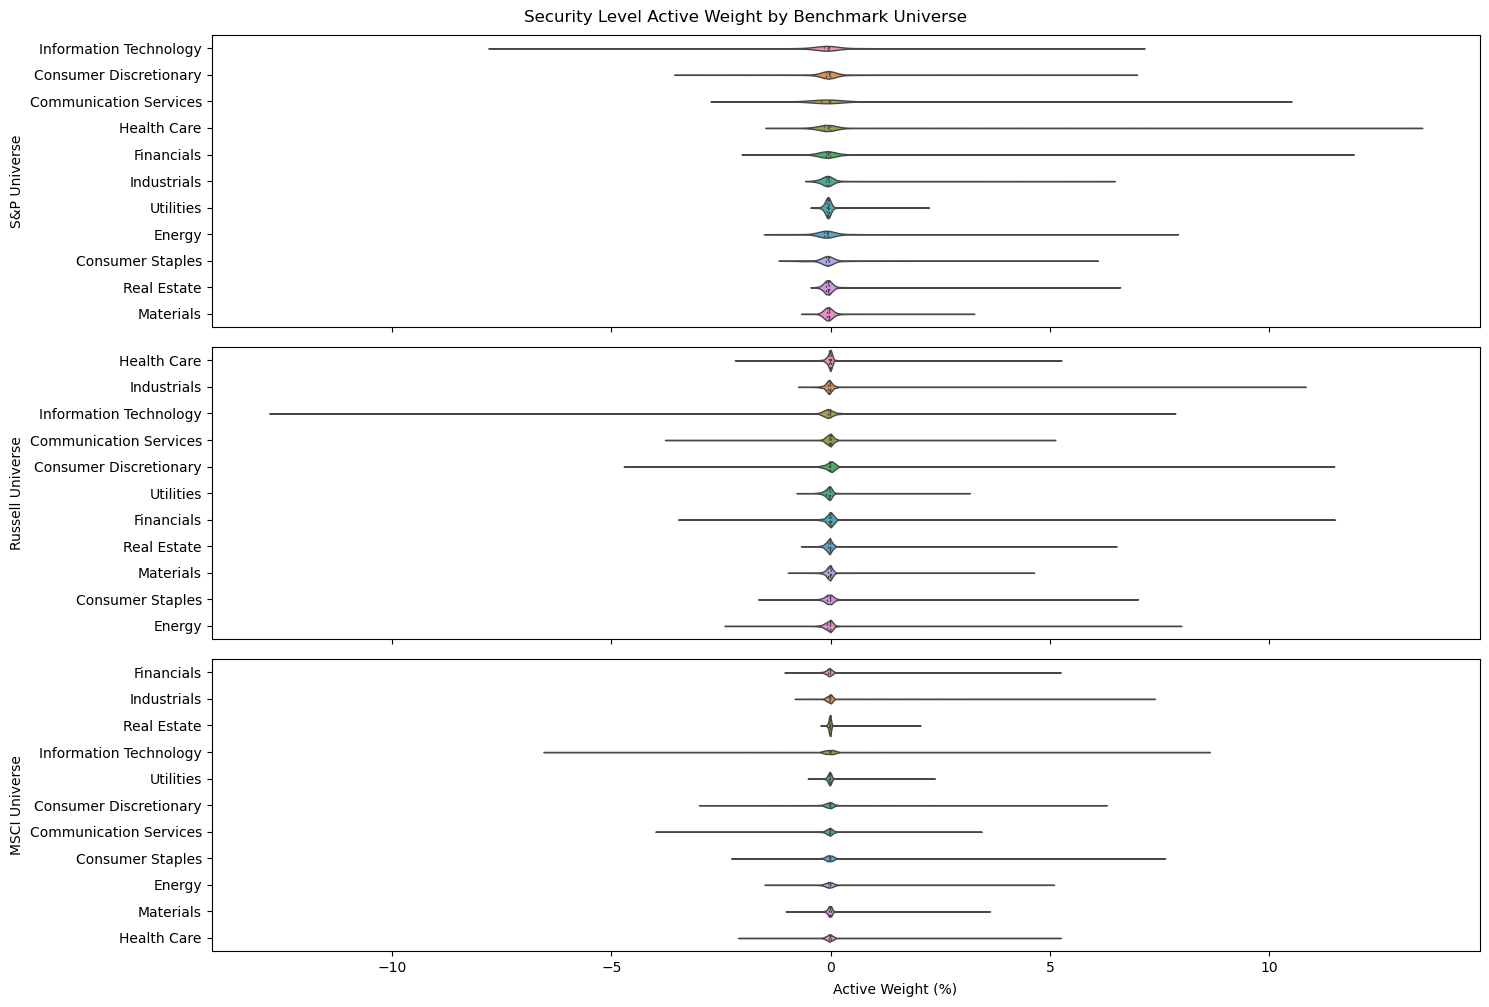

In [85]:
benchs = [('S&P',['SP50']),('Russell',['R.1000','R.1000G','R.1000V','R.2000','R.2000V','R.2000G','R.3000','R.MID']),('MSCI',['990300','892400','990100','899901','891800'])]
fig, axs = plt.subplots(len(benchs), 1,figsize=(15,10),sharex=True)  # Create subplots
dfb = df[df['GICS Sector']!="Other"]
# Iterate through each unique benchmark
for i, bench in enumerate(benchs): 
    sns.violinplot(data=dfb[dfb['bench_id'].isin(bench[1])].reset_index(), y="GICS Sector", x="Active Weight",
                   inner="quart", linewidth=1,orient ='h',ax=axs[i])
    axs[i].set_ylabel(f'{bench[0]} Universe')  # Set title for each subplot
    axs[i].set_xlabel('')

plt.suptitle("Security Level Active Weight by Benchmark Universe")
fig.text(0.6, -0, 'Active Weight (%)', ha='center', va='center') 
plt.tight_layout()  # Adjust spacing between subplots
plt.show()  # Show the plots

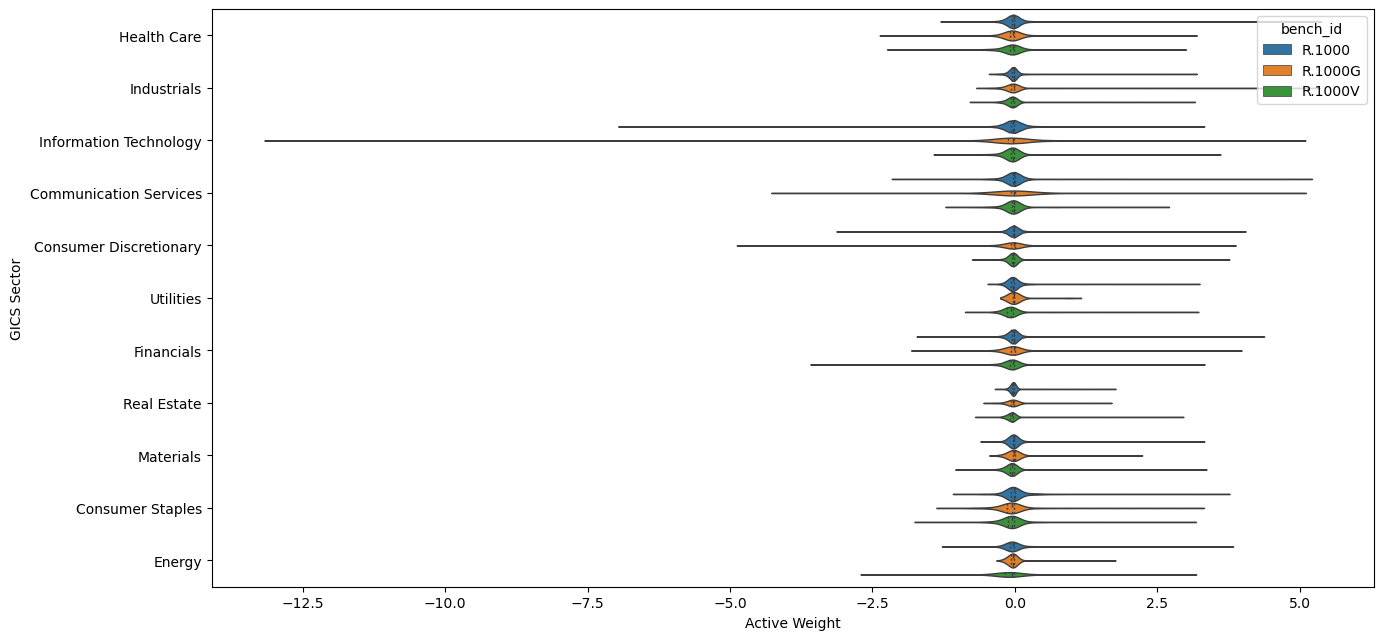

In [20]:
fig, axs = plt.subplots(figsize=(15,7.5)) 

rus_benchs = ['R.1000','R.1000G','R.1000V']
df_rus =df[df['bench_id'].isin(rus_benchs)]
sns.violinplot(data=df_rus[df_rus['GICS Sector']!='Other'].reset_index(), y="GICS Sector", x="Active Weight",hue = 'bench_id',
                   inner="quart", linewidth=1,orient ='h')
plt.show()

In [23]:
df[df['Active Weight']>10]

Security Name Ticker-Region  \
lionshares_id Symbol                                                     
JEPIX-US      LS000015                      EQUITY OTHER            --   
CFIMX-US      084670108  Berkshire Hathaway Inc. Class A      BRK.A-US   
AMINX-US      532457108            Eli Lilly and Company        LLY-US   
BGRIX-US      55354G100                MSCI Inc. Class A       MSCI-US   
MXXVX-US      31428X106                FedEx Corporation        FDX-US   
              38141G104        Goldman Sachs Group, Inc.         GS-US   
              88160R101                      Tesla, Inc.       TSLA-US   

                                    GICS Sector       GICS Industry Name  \
lionshares_id Symbol                                                       
JEPIX-US      LS000015                    Other                    Other   
CFIMX-US      084670108              Financials       Financial Services   
AMINX-US      532457108             Health Care          Pharmaceuticals   
BGRIX-US      55354G100              Financials          Capital Markets   
MXXVX-US      31428X106             Industrials  Air Freight & Logistics   
              38141G104              Financials          Capital Markets   
              88160R101  Consumer Discretionary              Automobiles   

                                                   GICS Industry Group  \
lionshares_id Symbol                                                     
JEPIX-US      LS000015                                           Other   
CFIMX-US      084670108                                          Other   
AMINX-US      532457108  Pharmaceuticals Biotechnology & Life Sciences   
BGRIX-US      55354G100                             Financial Services   
MXXVX-US      31428X106                                 Transportation   
              38141G104                             Financial Services   
              88160R101                       Automobiles & Components   

                                      GICS Sub Industry Region of Domicile  \
lionshares_id Symbol                                                         
JEPIX-US      LS000015                            Other                 --   
CFIMX-US      084670108                           Other      North America   
AMINX-US      532457108                 Pharmaceuticals      North America   
BGRIX-US      55354G100      Financial Exchanges & Data      North America   
MXXVX-US      31428X106         Air Freight & Logistics      North America   
              38141G104  Investment Banking & Brokerage      North America   
              88160R101        Automobile Manufacturers      North America   

                          MSCI Country P_Country     FF_Country  ...  \
lionshares_id Symbol                                             ...   
JEPIX-US      LS000015              --        --             --  ...   
CFIMX-US      084670108  United States        US  UNITED STATES  ...   
AMINX-US      532457108  United States        US  UNITED STATES  ...   
BGRIX-US      55354G100  United States        US  UNITED STATES  ...   
MXXVX-US      31428X106  United States        US  UNITED STATES  ...   
              38141G104  United States        US  UNITED STATES  ...   
              88160R101  United States        US  UNITED STATES  ...   

                         Active Weight     Asset Type  Asset Class      DATE  \
lionshares_id Symbol                                                           
JEPIX-US      LS000015       13.189404  Equity Common       Equity  20230831   
CFIMX-US      084670108      11.605324  Equity Common       Equity  20230831   
AMINX-US      532457108      13.178167  Equity Common       Equity  20230831   
BGRIX-US      55354G100      10.525418  Equity Common       Equity  20230831   
MXXVX-US      31428X106      10.737700  Equity Common       Equity  20230831   
              38141G104      11.405194  Equity Common       Equity  20230831   
              88160R101      11.

In [25]:
df[df['Active Weight']<-10]

,,Security Name,Ticker-Region,GICS Sector,GICS Industry Name,GICS Industry Group,GICS Sub Industry,Region of Domicile,MSCI Country,P_Country,FF_Country,...,Active Weight,Asset Type,Asset Class,DATE,Fund Ticker,FFD_NAME,"P_PRICE(0,USD)",aum,bench_id,Fund Brand
lionshares_id,Symbol,,,,,,,,,,,,,,,,,,,,,
APGYX-US,03783310,Apple Inc.,AAPL-US,Information Technology,Technology Hardware Storage & Peripherals,Technology Hardware & Equipment,Technology Hardware Storage & Peripherals,North America,United States,US,UNITED STATES,...,-12.648087,Equity Common,Equity,20230831,APGYX,AB Large Cap Growth Fund Inc,87.13,1.117037e+10,R.1000G,AB Funds
LSGRX-US,03783310,Apple Inc.,AAPL-US,Information Technology,Technology Hardware Storage & Peripherals,Technology Hardware & Equipment,Technology Hardware Storage & Peripherals,North America,United States,US,UNITED STATES,...,-12.648087,Equity Common,Equity,20230831,LSGRX,Loomis Sayles Funds II,23.13,1.004057e+10,R.1000G,Loomis Sayles


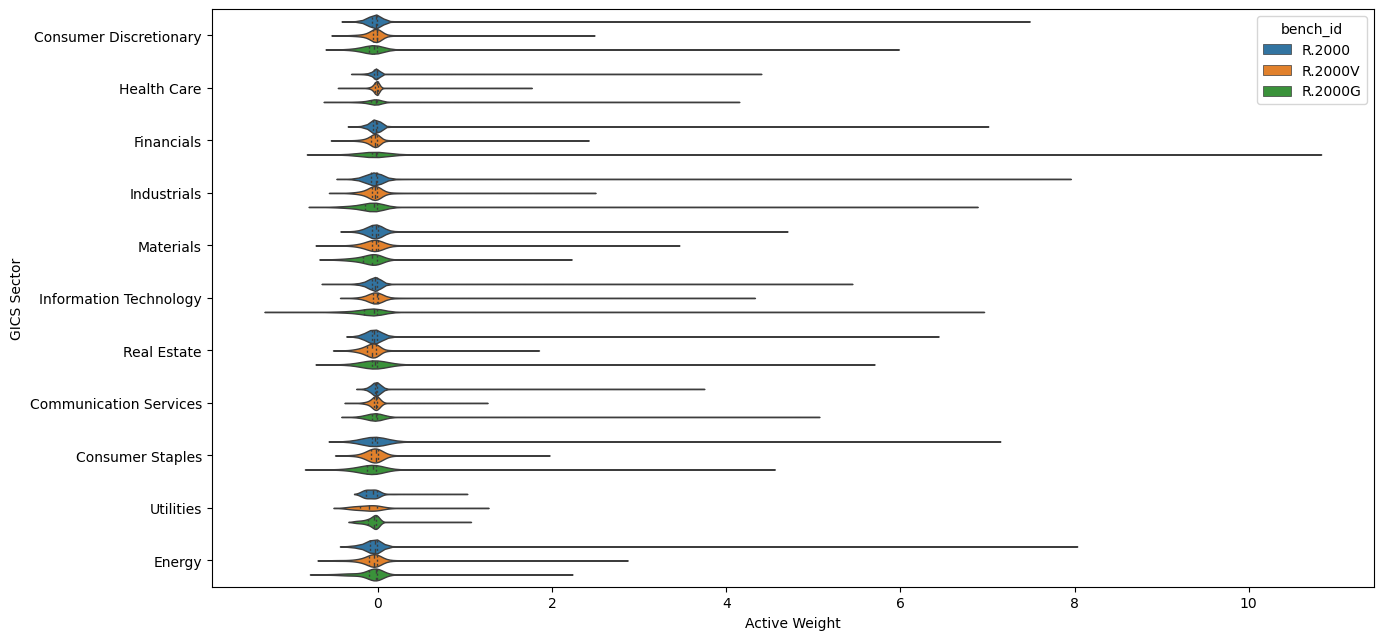

In [26]:
fig, axs = plt.subplots(figsize=(15,7.5)) 

rus_benchs = ['R.2000','R.2000V','R.2000G']
df_rus =df[df['bench_id'].isin(rus_benchs)]
sns.violinplot(data=df_rus[df_rus['GICS Sector']!='Other'].reset_index(), y="GICS Sector", x="Active Weight",hue = 'bench_id',
                   inner="quart", linewidth=1,orient ='h')
plt.show()

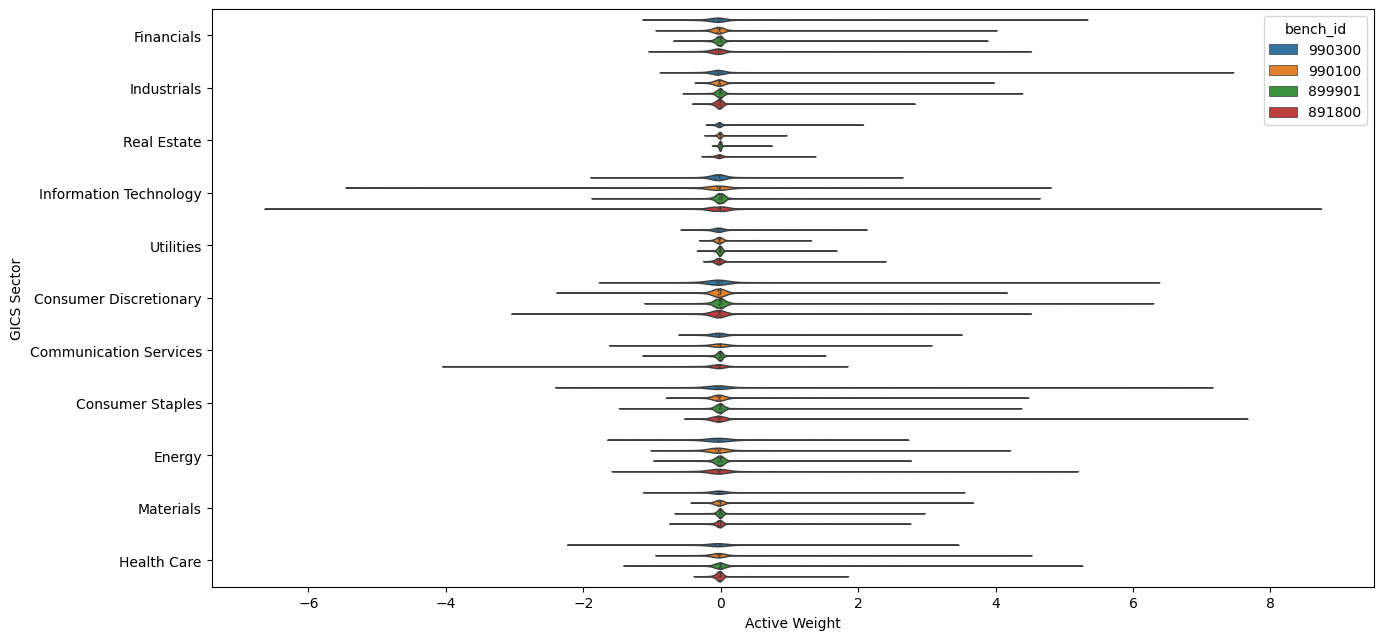

In [27]:
fig, axs = plt.subplots(figsize=(15,7.5)) 

msci_benchs = ['990300','990100','899901','891800']
df_rus =df[df['bench_id'].isin(msci_benchs)]
sns.violinplot(data=df_rus[df_rus['GICS Sector']!='Other'].reset_index(), y="GICS Sector", x="Active Weight",hue = 'bench_id',
                   inner="quart", linewidth=1,orient ='h')
plt.show()

In [41]:
df_plt=df_rus[df_rus['GICS Sector']!='Other'].reset_index()[['bench_id','Symbol','GICS Sector','Portfolio Weight','Benchmark Weight','Active Weight']].reset_index()[['bench_id','Symbol','GICS Sector','Portfolio Weight','Benchmark Weight','Active Weight']]

In [42]:
df_plt

,bench_id,Symbol,GICS Sector,Portfolio Weight,Benchmark Weight,Active Weight
0,990300,B1YW44,Financials,0.0,0.159646,-0.159646
1,990300,425305,Industrials,0.0,0.036117,-0.036117
2,990300,425304,Industrials,0.0,0.059402,-0.059402
3,990300,B9M3PK,Real Estate,0.0,0.025801,-0.025801
4,990300,710889,Industrials,0.0,0.389291,-0.389291
...,...,...,...,...,...,...
63336,891800,BL6P21,Consumer Discretionary,0.0,0.076100,-0.076100
63337,891800,BD5CPZ,Industrials,0.0,0.005703,-0.005703
63338,891800,BD5CPY,Information Technology,0.0,0.017559,-0.017559
63339,891800,B04KP8,Information Technology,0.0,0.036716,-0.036716


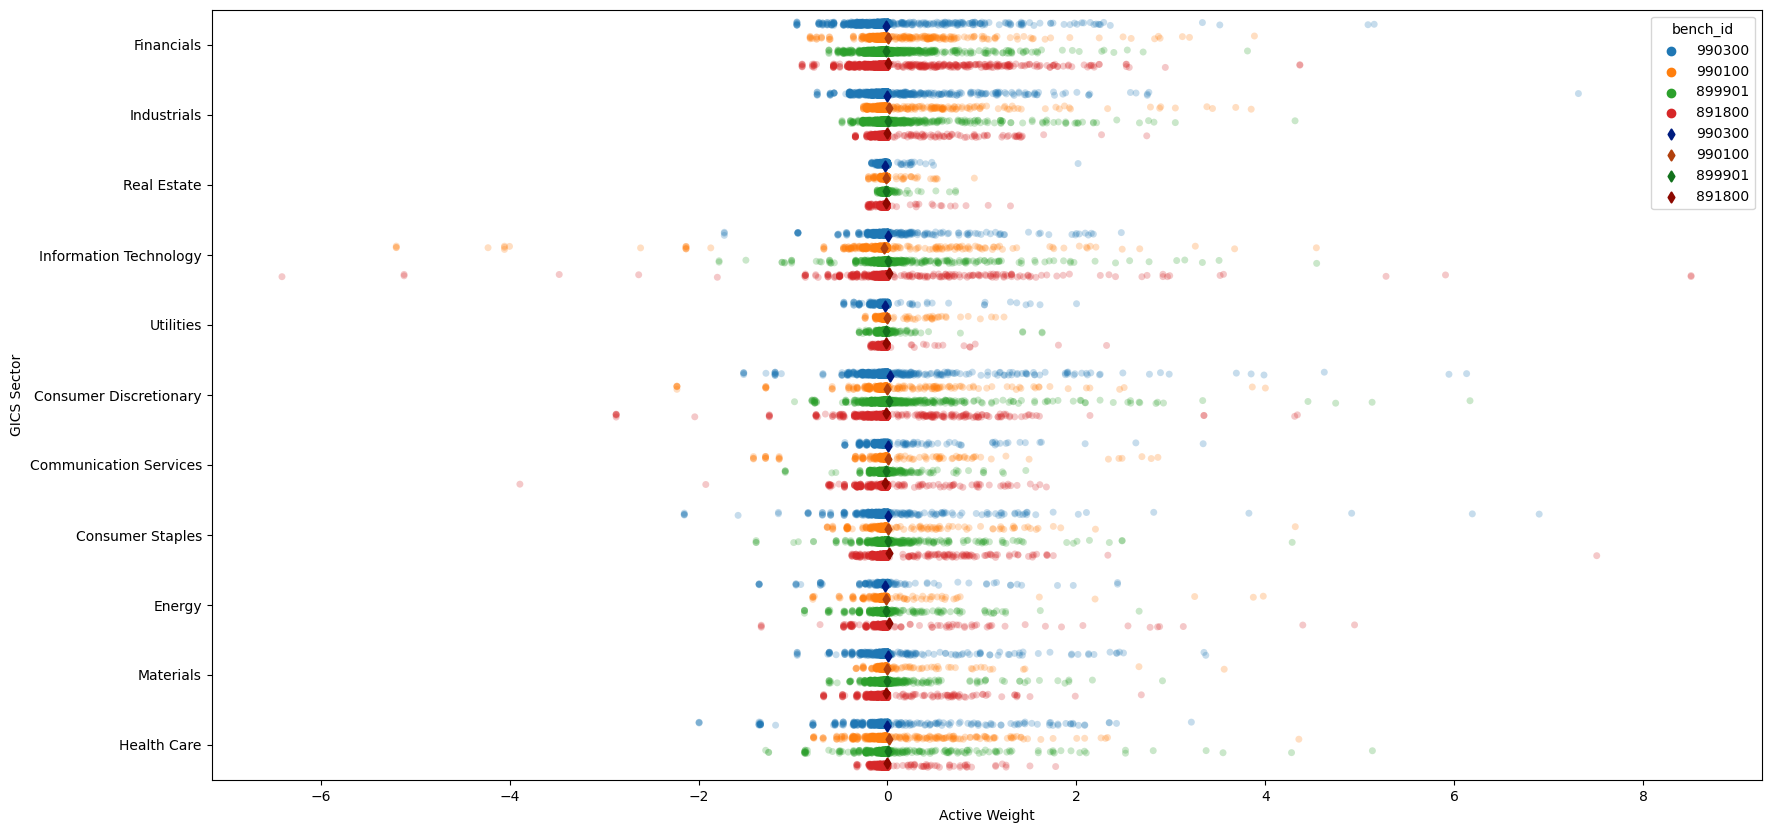

In [46]:
# Show each observation with a scatterplot
fig,ax = plt.subplots(figsize= (20,10))
sns.stripplot(
data=df_plt, y="GICS Sector",x='Active Weight',hue = 'bench_id',
dodge=True, alpha=.25, zorder=1,legend=False
)

sns.pointplot(
    data=df_plt, y="GICS Sector",x='Active Weight',hue = 'bench_id',
    join=False, dodge=.8 - .8 / 3, palette="dark",
    markers="d", scale=.75, errorbar=None
)
plt.show()

In [ ]:
# Show each observation with a scatterplot
sns.stripplot(
    data=df_plt,  hue="GIC Sector",
    dodge=True, alpha=.25, zorder=1, legend=False
)

# Show the conditional means, aligning each pointplot in the
# center of the strips by adjusting the width allotted to each
# category (.8 by default) by the number of hue levels
sns.pointplot(
    data=iris, x="value", y="measurement", hue="species",
    join=False, dodge=.8 - .8 / 3, palette="dark",
    markers="d", scale=.75, errorbar=None
)

# Improve the legend
sns.move_legend(
    ax, loc="lower right", ncol=3, frameon=True, columnspacing=1, handletextpad=0
)

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")

# Make the PairGrid
g = sns.PairGrid(data=df_rus[df_rus['GICS Sector']!='Other'].reset_index(),
                 x_vars=crashes.columns[:-3], y_vars=["abbrev"],
                 height=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, 25), xlabel="Crashes", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["Total crashes", "Speeding crashes", "Alcohol crashes",
          "Not distracted crashes", "No previous crashes"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

In [91]:
df.groupby(['bench_id','lionshares_id','GICS Sector']).agg({'Active Weight':'sum'}).reset_index().groupby(['bench_id','GICS Sector']).agg({'Active Weight':'mean'}).unstack().droplevel(0,axis=1)

GICS Sector,Communication Services,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Other,Real Estate,Utilities
bench_id,,,,,,,,,,,,
891800,-2.000761,-1.493750,1.994541,1.118436,1.786206,-0.835397,-0.869090,2.752659,-2.939552,2.677425,-0.836589,-1.354127
899901,-2.100740,4.629604,0.429646,-1.088823,-5.066052,2.076157,1.627264,2.586433,-2.004459,1.898615,-1.412566,-1.575079
990100,0.077543,-0.291575,0.986235,-0.605500,1.209004,1.916389,3.830058,-6.270143,-0.127324,0.751383,-1.380898,-0.095172
990300,0.115970,3.438201,0.119279,-0.669631,-1.903390,-0.758086,-0.535884,0.430009,0.716031,1.935385,-1.568871,-1.319012
R.1000,-2.283913,-1.469591,2.538832,-0.032935,0.962307,2.490758,1.877190,-5.565135,1.359482,0.955821,-0.919397,0.086580
R.1000G,-0.021740,-1.519582,-1.026535,-0.148800,1.629752,2.955479,0.111276,-3.630872,0.498362,1.367062,-0.260782,0.046380
R.1000V,0.178202,0.363208,-1.279198,0.467289,0.851283,2.508390,-1.044064,1.693244,-1.525363,1.401407,-2.476198,-1.138201
R.2000,-0.788066,-0.732015,2.801087,-4.666520,-0.939526,-4.677453,7.076324,-1.565437,0.559234,5.247807,-0.663832,-1.651603
R.2000G,-0.058816,2.340369,-0.973704,-2.865377,4.109027,-2.940598,1.275827,-0.550310,-2.470910,3.104184,0.477452,-1.447145


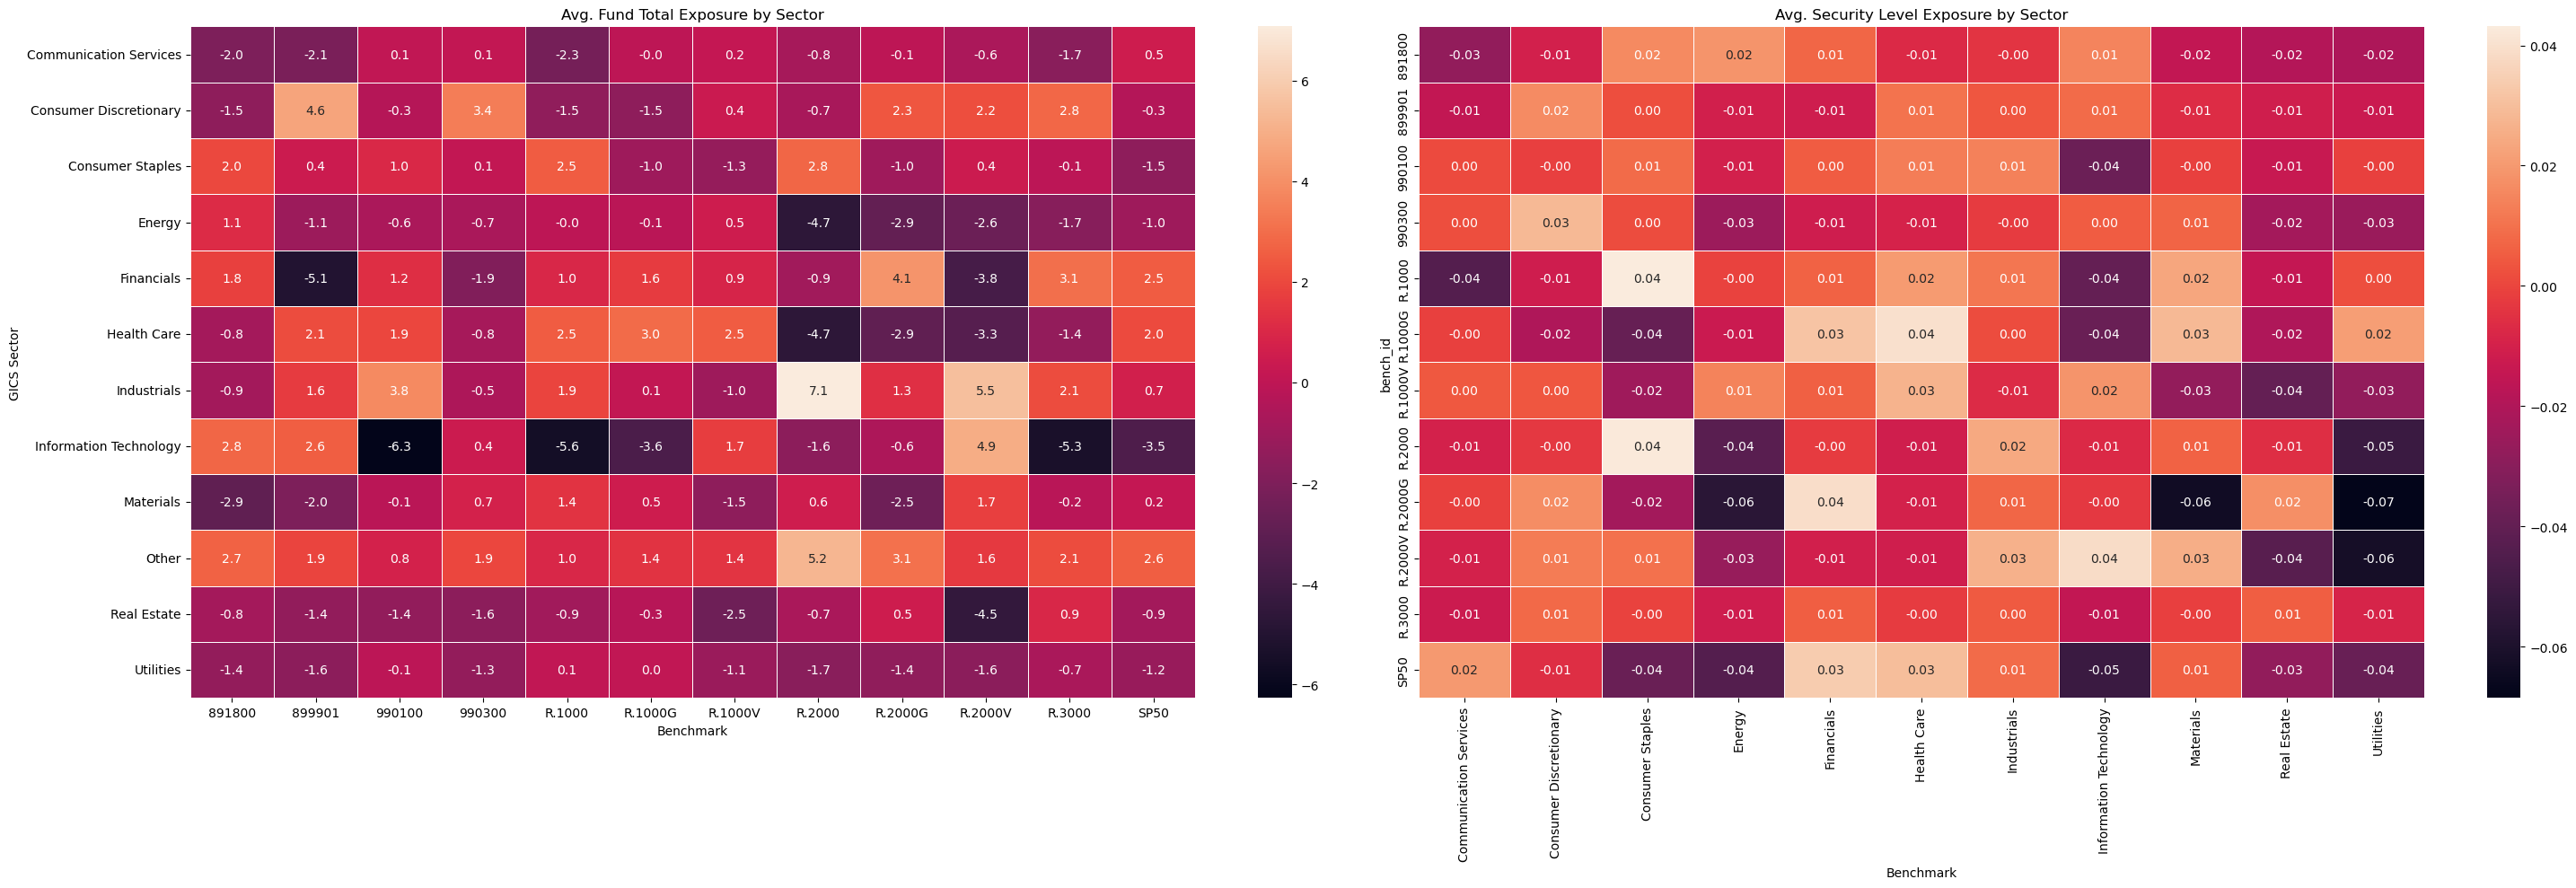

In [100]:
fig,axs = plt.subplots(1,2,figsize=(30,10))
sns.heatmap(df.groupby(['bench_id','lionshares_id','GICS Sector']).agg({'Active Weight':'sum'}).reset_index().groupby(['bench_id','GICS Sector']).agg({'Active Weight':'mean'}).unstack().droplevel(0,axis=1).T,
            linewidth=.5,ax=axs[0], annot=True,fmt=".1f")

axs[0].set_title("Avg. Fund Total Exposure by Sector")
axs[0].set_xlabel('Benchmark')
sns.heatmap(df[df['GICS Sector']!='Other'].groupby(['bench_id','GICS Sector']).agg({'Active Weight':'mean'}).unstack().droplevel(0,axis=1),
            linewidth=.5,ax=axs[1], annot=True,fmt=".2f")

axs[1].set_title("Avg. Security Level Exposure by Sector")
axs[1].set_xlabel('Benchmark')

plt.tight_layout()

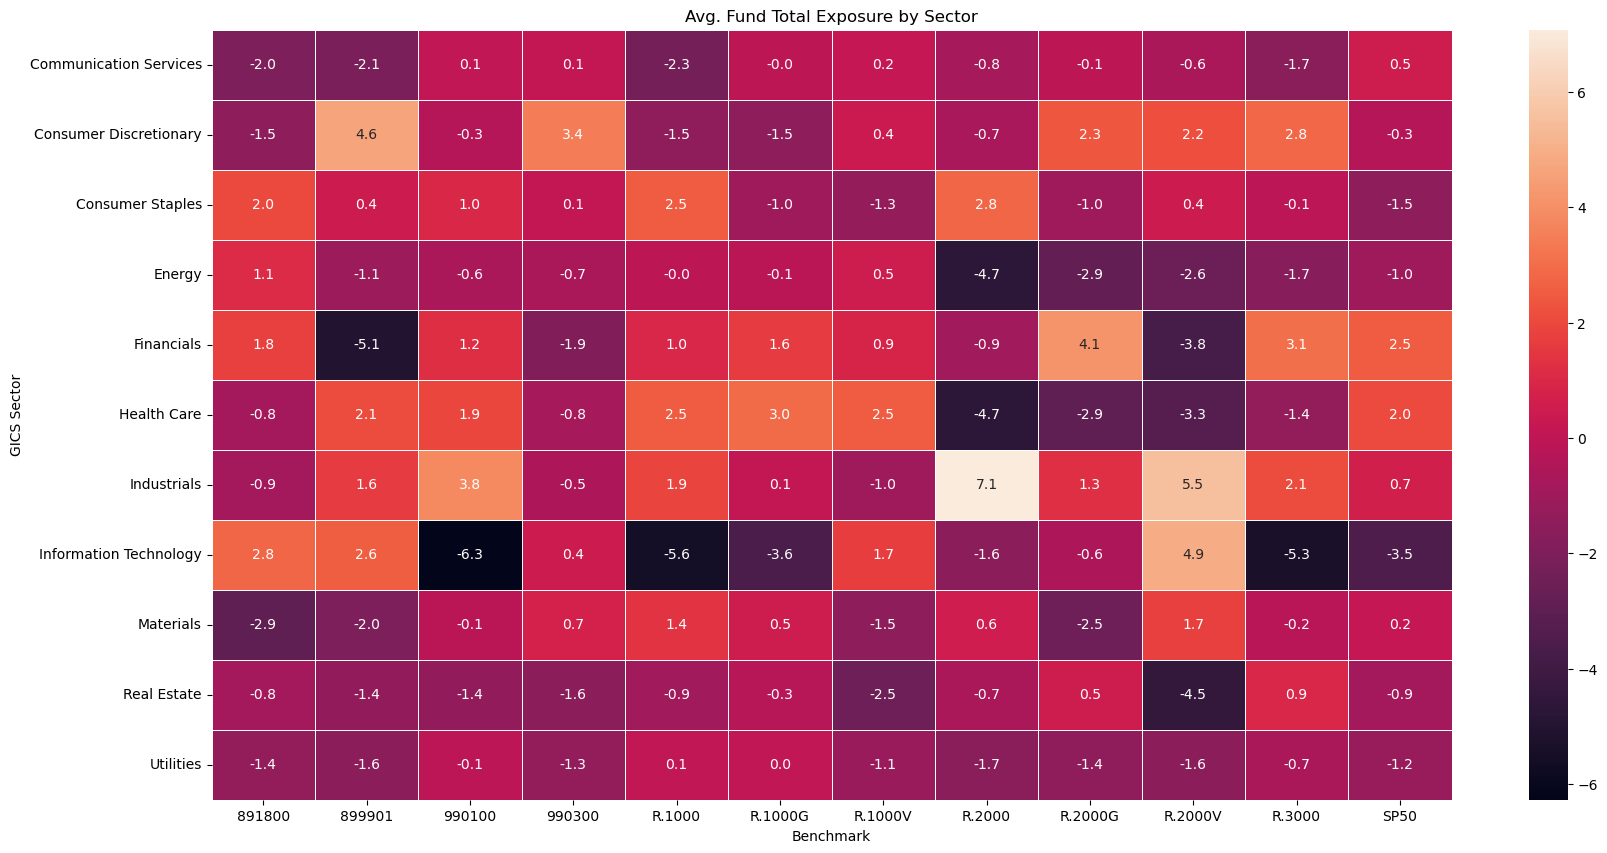

In [104]:
fig,axs = plt.subplots(figsize=(20,10))
sns.heatmap(df[df['GICS Sector']!='Other'].groupby(['bench_id','lionshares_id','GICS Sector']).agg({'Active Weight':'sum'}).reset_index().groupby(['bench_id','GICS Sector']).agg({'Active Weight':'mean'}).unstack().droplevel(0,axis=1).T,
            linewidth=.5,annot=True,fmt=".1f")

plt.title("Avg. Fund Total Exposure by Sector")
plt.xlabel('Benchmark')
plt.savefig('top_fund_positioning_avg_sector_active_exp_heatmap.png')
plt.show()

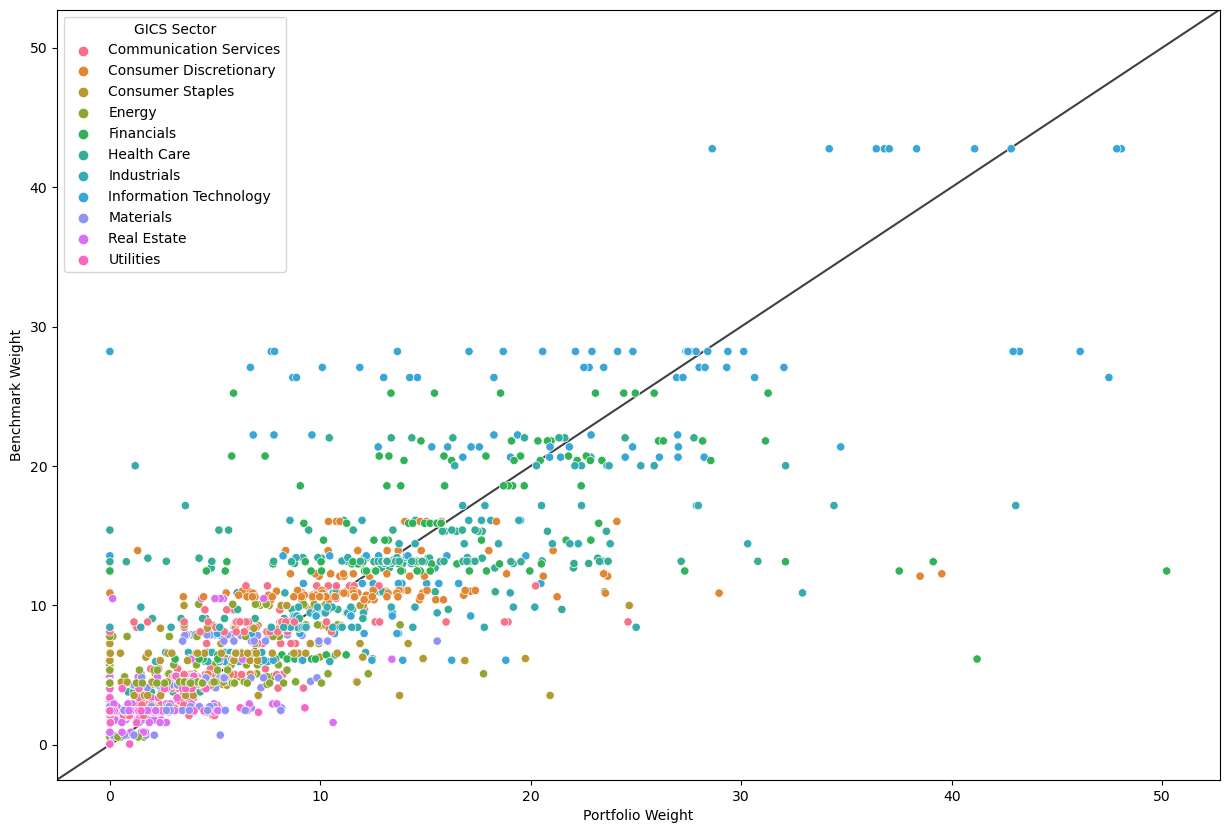

In [29]:
fig,ax = plt.subplots(figsize=(15,10))
sns.scatterplot(df[df['GICS Sector']!='Other'].groupby(['bench_id','Fund Ticker','GICS Sector']).agg({'Portfolio Weight':'sum',
'Benchmark Weight':'sum'}),
x = 'Portfolio Weight',
y = 'Benchmark Weight',
hue = 'GICS Sector')

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against each other
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_xlim(lims)
ax.set_ylim(lims)
plt.show()

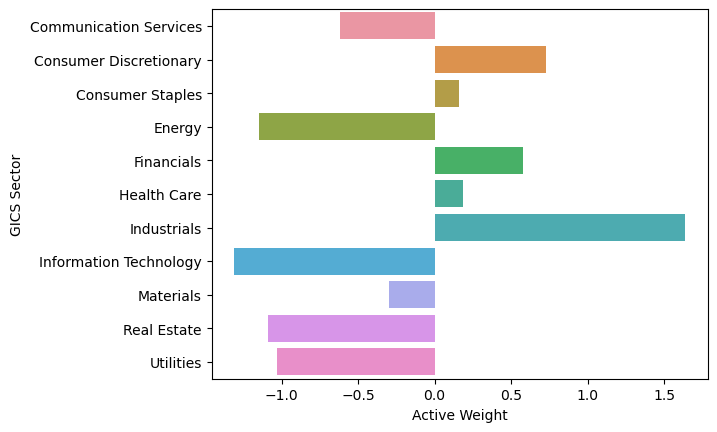

In [30]:
sns.barplot(df[df['GICS Sector']!='Other'].groupby(['bench_id','Fund Ticker','GICS Sector']).agg({'Active Weight':'sum'}).reset_index(),
orient = 'h',
x = 'Active Weight',
y = 'GICS Sector',errorbar=None)

plt.show()

In [ ]:
len(df['Fund Ticker'].unique())

In [31]:
df.groupby(['Fund Ticker','GICS Sector']).agg({'Active Weight':'sum'}).sort_values('Active Weight')

,,Active Weight
Fund Ticker,GICS Sector,
LLPFX,Information Technology,-28.211348
CFIMX,Information Technology,-20.541834
ALVIX,Information Technology,-20.391478
OAKLX,Information Technology,-20.385809
RYPNX,Financials,-19.344324
...,...,...
MXXVX,Financials,25.993259
PWJZX,Consumer Discretionary,26.406183
LLINX,Consumer Discretionary,27.268455


In [53]:
df.groupby(['Ticker-Region']).agg({'Active Weight':'mean'}).sort_values('Active Weight')

,Active Weight
Ticker-Region,
AAPL-US,-3.469767
MSFT-US,-1.189434
BRK.B-US,-1.036182
TSLA-US,-0.911742
AMZN-US,-0.694344
...,...
IBN-US,2.706973
ABBNY-US,2.784230
DOM-GB,2.972213


In [55]:
df[df['Ticker-Region']!='--'].groupby(['Ticker-Region']).agg({'Active Weight':'sum'}).sort_values('Active Weight')

,Active Weight
Ticker-Region,
AAPL-US,-218.595307
MSFT-US,-82.070950
BRK.B-US,-63.207092
TSLA-US,-56.527974
AMZN-US,-43.743646
...,...
ASML-US,20.634967
005930-KR,21.878921
MELI-US,22.241428


In [57]:
df[df['Ticker-Region']!='--'].groupby(['Ticker-Region']).agg({'Portfolio Weight':'sum'}).sort_values('Portfolio Weight')

,Portfolio Weight
Ticker-Region,
CRC.F-TH,0.000000
CPAXT-TH,0.000000
MNTV-US,0.000000
FFX-AU,0.000000
AVZ-AU,0.000000
...,...
GOOGL-US,138.101787
NVDA-US,158.902502
AMZN-US,164.547494


In [58]:
df[df['Ticker-Region']!='--'].groupby(['Ticker-Region']).agg({'Portfolio Weight':'mean'}).sort_values('Portfolio Weight')

,Portfolio Weight
Ticker-Region,
TATN-RU,0.000000
CRC-TH,0.000000
PLZL-RU,0.000000
YNDX-US,0.000000
NLMK-RU,0.000000
...,...
2330-TW,3.075690
APPS-ES,3.657488
AAPL-US,4.004411
